# 준비

In [1]:
import pandas as pd
import numpy as np
import os
import re

import nltk
from numpy.random import randint, seed
from sklearn.feature_extraction.text import CountVectorizer

import konlpy
from konlpy.tag import Twitter

from collections import Counter
from wordcloud import WordCloud

from PIL import Image  
from IPython.display import set_matplotlib_formats
from nltk.corpus import stopwords

In [2]:
# 시각화를 위한 패키지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # '-' 깨짐 방지

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 깨짐 방지
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
%matplotlib inline

import seaborn as sns
# sns.set()

In [3]:
os.getcwd()

'C:\\workspace\\Python\\4-2) 핀테크 교육\\Final Project\\Project1'

In [4]:
os.chdir(r".\data")
os.getcwd()

'C:\\workspace\\Python\\4-2) 핀테크 교육\\Final Project\\Project1\\data'

# Load data

In [5]:
my_text=pd.read_csv("SH_card.csv", encoding='CP949')
my_text.shape

(255, 2)

In [6]:
my_text.tail()

,text,date
250,카카오페이 지방세 캐시백 이벤트,2017.09.27~2017.12.28
251,공항라운지 이용방법 확대 이벤트,2017.09.18~2018.02.01
252,롯데호텔 Haute Afternoon 이벤트,2017.09.01~2017.11.30
253,부산 웨스틴조선호텔 까밀리아 뷔페권 이벤트,2017.09.18~2017.11.30
254,신한 FAN 신규가입 이벤트 프로야구 H2 특급 아이템!,2017.09.14~2017.12.28


In [7]:
my_text['text'].values[:10]

array(['신한 FAN 이용금액별 포인트 적립 이벤트', '신한카드 행복드림(Dream) 페스티벌!',
       '워너원 한정판 체크카드 사용하고 경품받자!', 'L7호텔 Yellow Summer 이벤트',
       '파크 하얏트 서울 Summer Staycation 이벤트', '「신한카드 골프 챌린지」참가 신청 안내',
       '해외여행 최대 5% + 최대 10만원할인', 'PEUGEOT 2008 SUV Zero 이벤트',
       '시트로엥 C4 CACTUS Zero 이벤트', '신한카드 YOOX 10~15% 추가할인'], dtype=object)

# 전처리

In [8]:
len(my_text['text'].values) - len(set(my_text['text'].values)) # 중복 데이터

39

In [9]:
no_meaning = "이벤트|신한카드|신한"
my_text_clean = []

for a_line in set(my_text['text'].values):
    a_line = re.sub('[^ㄱ-ㅣ가-힣]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line)           # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)               # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [10]:
my_text_clean[:10]

['제주신화월드 패키지 ',
 ' 새해맞이 신차구매 ',
 '네이버페이 간편결제 이용 ',
 '와 듀오 미팅 ',
 '카카오페이 지방세 캐시백 ',
 ' 체크카드 출시 ',
 '볼보를 부담 없이 구매할 수 있는 기회 ',
 ' 월 신규가입 ',
 '해외여행 최대 최대 만원할인',
 '신세계 런칭 주년 제 탄 ']

In [11]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출
my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)
    
#my_words[:10]

In [12]:
# 단음절 제거
my_words_2 = [""]
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2[0] += " " + a_word
        
#my_words_2

# 워드 클라우드

In [13]:
# 워드클라우드
a_long_sentence = ' '.join(my_words_2)
mask_round = np.array(Image.open("mask.jpg"))

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', 
               max_words=20, colormap='nipy_spectral', mask=mask_round) 
wc.generate(a_long_sentence)
#wc.words_

In [14]:
for i, n in zip(wc.words_.keys(), range(1, 11)):
    print(n, "위 : ", i)

1 위 :  캐시백
2 위 :  할인
3 위 :  최대
4 위 :  혜택
5 위 :  포인트
6 위 :  패키지
7 위 :  신규가입
8 위 :  호텔
9 위 :  추가할인
10 위 :  적립


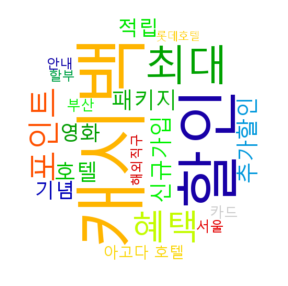

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2-gram

In [16]:
n = 2                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [17]:
n_grams = vectorizer.fit(my_words_2).get_feature_names()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_words_2).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

In [18]:
res_dict = {}
for z, zz in zip(n_grams, n_gram_cts):
    res_dict[z] = zz
res_dict = sorted(res_dict.items(), key=(lambda x: x[1]), reverse=True)
res_dict[:10]

[('아고다 호텔', 7),
 ('최대 캐시백', 5),
 ('신세계상품권 증정', 3),
 ('아트 컬렉션', 3),
 ('연회비 캐시백', 3),
 ('올댓쇼핑 첫구', 3),
 ('첫구 감사', 3),
 ('포인트 적립', 3),
 ('플라자 호텔', 3),
 ('하얏트 서울', 3)]

# 연관 단어 확인

## 신한카드

In [19]:
def predict(text):
    n = 0
    print(text, "--->", end=" ")
    for i in range(len(res_dict)):
        if text == res_dict[i][0].split(" ")[0]:
            print(res_dict[i][0].split(" ")[1], end=" ")
            n += 1
        if n == 10:
            break
    print("")
    
def predict_arr(arr):
    for i in arr:
        predict(i)

In [20]:
predict_arr(['캐시백', '할인', '최대', '혜택', '포인트'])

캐시백 ---> 해외직구 게임만해 골프 교통카드 국내 내차처럼 받으 손해보험 시트로엥 신규발급 
할인 ---> 영화 해외직구 대보험료 도시가스 롯데월드 벅스 부산 신규가입 아트 올댓쇼핑 
최대 ---> 캐시백 올댓쇼핑 포인트 만원할인 선착순 설맞 신학기 최대 특별 특별적립 
혜택 ---> 가족형금융안심서비스 내게로 맞이 영화 올댓쇼핑 위치기반 최대 카드 포인트 해외딥 
포인트 ---> 적립 구매 드림 스포츠누리카드 전국 캐시백 파라다이스호텔 


In [21]:
predict_arr(['여행', '맛집', '종합', '오늘', '개최', 
           '서울', '부산', '올해', '제주', '공개'])

여행 ---> 
맛집 ---> 
종합 ---> 
오늘 ---> 
개최 ---> 
서울 ---> 네이버페 디큐브시티 레이디스 만요 연말 추가할인 
부산 ---> 호텔 송도해상케이블카 웨스틴조선부산 웨스틴조선호텔 패키지 
올해 ---> 
제주 ---> 렌트카 신나는한판 퍼시픽랜드 
공개 ---> 


## 삼성카드

In [22]:
my_text=pd.read_csv("SS_card.csv")
my_text.shape

(609, 2)

In [23]:
no_meaning = "이벤트|삼성카드|삼성"
my_text_clean = []

for a_line in set(my_text['text'].values):
    a_line = re.sub('[^ㄱ-ㅣ가-힣]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line)           # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)               # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [24]:
hannanum = konlpy.tag.Hannanum()

my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)
    
my_words_2 = [""]
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2[0] += " " + a_word

In [25]:
# 워드클라우드
a_long_sentence = ' '.join(my_words_2)
mask_round = np.array(Image.open("mask.jpg"))

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', 
               max_words=20, colormap='nipy_spectral', mask=mask_round) 
wc.generate(a_long_sentence)
#wc.words_

In [26]:
for i, n in zip(wc.words_.keys(), range(1, 11)):
    print(n, "위 : ", i)

1 위 :  혜택
2 위 :  여행
3 위 :  행운
4 위 :  할인
5 위 :  캐시백
6 위 :  호텔
7 위 :  선물
8 위 :  프로모션
9 위 :  가입
10 위 :  만원


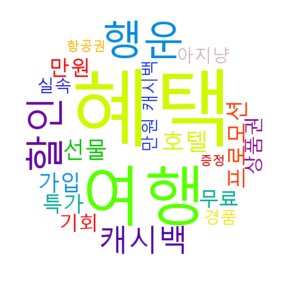

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
n = 2                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [29]:
n_grams = vectorizer.fit(my_words_2).get_feature_names()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_words_2).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

In [30]:
res_dict = {}
for z, zz in zip(n_grams, n_gram_cts):
    res_dict[z] = zz
res_dict = sorted(res_dict.items(), key=(lambda x: x[1]), reverse=True)
res_dict[:10]

[('만원 캐시백', 11),
 ('여행 혜택', 10),
 ('혜택 여행', 9),
 ('호텔 혜택', 8),
 ('가연 미팅파티', 6),
 ('창립 주년', 6),
 ('호텔 예약', 6),
 ('화재 다이렉트', 6),
 ('겨울 여행', 5),
 ('다이렉트 오토', 5)]

In [31]:
def predict(text):
    n = 0
    print(text, "--->", end=" ")
    for i in range(len(res_dict)):
        if text == res_dict[i][0].split(" ")[0]:
            print(res_dict[i][0].split(" ")[1], end=" ")
            n += 1
        if n == 10:
            break
    print("")
    
def predict_arr(arr):
    for i in arr:
        predict(i)

In [32]:
predict_arr(['혜택', '여행', '행운', '할인', '캐시백'])

혜택 ---> 여행 모음 생활앱 아지냥 안내 지금 가득 가연 기회 다이렉트 
여행 ---> 혜택 고민 날개 여름 여행 이때 준비 항공권 행운 호텔 
행운 ---> 고객만족 도착 여행 구매 글래드여의도호텔 금호리조트 렌탈 롯데월드 마세요 멤버십 
할인 ---> 상품권 영화 가정 개월 겨울 다이렉트 더블쿠폰 매직카 명의보호알림 무이자할부 
캐시백 ---> 혜택 쇼핑케어 여행 주간 창립 휴대전화 갤럭시 경품 광주패밀리랜드 국세 


In [33]:
predict_arr(['여행', '맛집', '종합', '오늘', '개최', 
           '서울', '부산', '올해', '제주', '공개'])

여행 ---> 혜택 고민 날개 여름 여행 이때 준비 항공권 행운 호텔 
맛집 ---> 
종합 ---> 
오늘 ---> 
개최 ---> 
서울 ---> 프리미엄 
부산 ---> 
올해 ---> 
제주 ---> 할인 
공개 ---> 현대해상 


## 국민카드

In [34]:
my_text=pd.read_csv("KB_card.csv")
my_text.shape

(265, 2)

In [35]:
no_meaning = "이벤트|국민카드|국민"
my_text_clean = []

for a_line in set(my_text['text'].values):
    a_line = re.sub('[^ㄱ-ㅣ가-힣]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line)           # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)               # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [36]:
hannanum = konlpy.tag.Hannanum()

my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)
    
my_words_2 = [""]
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2[0] += " " + a_word

In [37]:
# 워드클라우드
a_long_sentence = ' '.join(my_words_2)
mask_round = np.array(Image.open("mask.jpg"))

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', 
               max_words=20, colormap='nipy_spectral', mask=mask_round) 
wc.generate(a_long_sentence)
#wc.words_

In [38]:
for i, n in zip(wc.words_.keys(), range(1, 11)):
    print(n, "위 : ", i)

1 위 :  캐시백
2 위 :  혜택
3 위 :  할인
4 위 :  체크카드
5 위 :  최대
6 위 :  최대 만원
7 위 :  자동납부
8 위 :  만원 캐시백
9 위 :  청구할인
10 위 :  여행


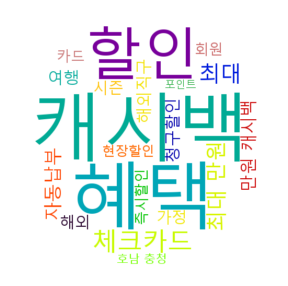

In [39]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
n = 2                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [41]:
n_grams = vectorizer.fit(my_words_2).get_feature_names()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_words_2).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

In [42]:
res_dict = {}
for z, zz in zip(n_grams, n_gram_cts):
    res_dict[z] = zz
res_dict = sorted(res_dict.items(), key=(lambda x: x[1]), reverse=True)
res_dict[:10]

[('최대 만원', 13),
 ('만원 캐시백', 9),
 ('최대 할인', 6),
 ('호남 충청', 6),
 ('충청 제주', 5),
 ('개월 무이자할부', 4),
 ('만원 청구할인', 4),
 ('스마트폰 구입', 4),
 ('객실 할인', 3),
 ('국제선 항공권', 3)]

In [43]:
def predict(text):
    n = 0
    print(text, "--->", end=" ")
    for i in range(len(res_dict)):
        if text == res_dict[i][0].split(" ")[0]:
            print(res_dict[i][0].split(" ")[1], end=" ")
            n += 1
        if n == 10:
            break
    print("")
    
def predict_arr(arr):
    for i in arr:
        predict(i)

In [44]:
predict_arr(['캐시백', '혜택', '할인', '체크카드', '최대'])

캐시백 ---> 체크카드 경품 계좌 라이프샵 상품권 가격보고 개월 공기청정기 대형슈퍼 도시가스요금 
혜택 ---> 트렌드 해외 해외직구 가정의달 가족 개인사업자 공공임대료 금호타이어 까사미 내꺼 
할인 ---> 가위바위보 가정 개월 골프 도시가스요금 등록 롯데월드 마이갓 반값다 백화점 
체크카드 ---> 만원 신규발급 체크 탐앤탐스 기업카드 대한민국 매일매일 봄날 부동산임대료 설준비 
최대 ---> 만원 할인 즉시할인 포인트 마이갓 무료배송 보너스 스피드메이트 


In [45]:
predict_arr(['여행', '맛집', '종합', '오늘', '개최', 
           '서울', '부산', '올해', '제주', '공개'])

여행 ---> 시작 필독 강원 동반자 시암파라곤 처음 
맛집 ---> 
종합 ---> 
오늘 ---> 
개최 ---> 
서울 ---> 한샘 
부산 ---> 
올해 ---> 
제주 ---> 가구업체 객실 설맞 학원업체 
공개 ---> 


## 우리카드

In [46]:
my_text=pd.read_csv("WR_card.csv")
my_text.shape

(163, 2)

In [47]:
no_meaning = "이벤트|우리카드|우리"
my_text_clean = []

for a_line in set(my_text['text'].values):
    a_line = re.sub('[^ㄱ-ㅣ가-힣]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line)           # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)               # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [48]:
hannanum = konlpy.tag.Hannanum()

my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)
    
my_words_2 = [""]
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2[0] += " " + a_word

In [49]:
# 워드클라우드
a_long_sentence = ' '.join(my_words_2)
mask_round = np.array(Image.open("mask.jpg"))

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', 
               max_words=20, colormap='nipy_spectral', mask=mask_round) 
wc.generate(a_long_sentence)
#wc.words_

In [50]:
for i, n in zip(wc.words_.keys(), range(1, 11)):
    print(n, "위 : ", i)

1 위 :  할인
2 위 :  청구할인
3 위 :  자동납부
4 위 :  캐시백
5 위 :  체크카드
6 위 :  혜택
7 위 :  최대 할인
8 위 :  웨딩밴드
9 위 :  카드
10 위 :  이용


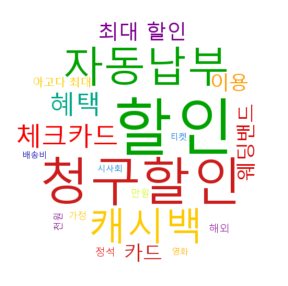

In [51]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
n = 2                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [53]:
n_grams = vectorizer.fit(my_words_2).get_feature_names()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_words_2).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

In [54]:
res_dict = {}
for z, zz in zip(n_grams, n_gram_cts):
    res_dict[z] = zz
res_dict = sorted(res_dict.items(), key=(lambda x: x[1]), reverse=True)
res_dict[:10]

[('최대 할인', 8),
 ('아고다 최대', 7),
 ('최대 만원', 4),
 ('카드 정석', 4),
 ('공사 임대주택', 3),
 ('만원 캐시백', 3),
 ('임대료 자동납부', 3),
 ('임대주택 임대료', 3),
 ('지방세 납부', 3),
 ('티켓 할인', 3)]

In [55]:
def predict(text):
    n = 0
    print(text, "--->", end=" ")
    for i in range(len(res_dict)):
        if text == res_dict[i][0].split(" ")[0]:
            print(res_dict[i][0].split(" ")[1], end=" ")
            n += 1
        if n == 10:
            break
    print("")
    
def predict_arr(arr):
    for i in arr:
        predict(i)

In [56]:
predict_arr(['할인', '청구할인', '자동납부', '캐시백', '체크카드'])

할인 ---> 영화 공사 나만의카드 대학생 도시가스요금 마지막 미국 빨간날 스페셜 시즌 
청구할인 ---> 겨울 기념주화 던킨도너츠 목표달성 웨딩밴드 위비꿀파트너 위비마켓 이하넥스 지방세 체크카드 
자동납부 ---> 청구할인 달콤한 대학 빨간날엔 사회보험료 썸타 아고다 웨딩밴드 한파끝 현대백화점 
캐시백 ---> 경품 고객만 선착순 온더보더 이하넥스 체크카드 탐앤탐스 할부 항공권 홍콩 
체크카드 ---> 기업 대학생 등록 목표달성 뮤지컬 배스킨라빈스 온라인 출시 행복한 


In [57]:
predict_arr(['여행', '맛집', '종합', '오늘', '개최', 
           '서울', '부산', '올해', '제주', '공개'])

여행 ---> 전국 정석 혜택 
맛집 ---> 최대 
종합 ---> 
오늘 ---> 
개최 ---> 
서울 ---> 경기 
부산 ---> 
올해 ---> 
제주 ---> 
공개 ---> 


## 하나카드

In [58]:
my_text=pd.read_csv("HN_card.csv")
my_text.shape

(355, 2)

In [59]:
no_meaning = "이벤트|하나카드|하나"
my_text_clean = []

for a_line in set(my_text['text'].values):
    a_line = re.sub('[^ㄱ-ㅣ가-힣]+', ' ', a_line) # 한글, 숫자 이외는 모두 공백으로
    a_line = re.sub(no_meaning, '', a_line)           # 의미없는 문자 삭제
    a_line = re.sub('\s+', ' ', a_line)               # 잉여 스페이스를 공백 하나로
    my_text_clean += [a_line]

In [60]:
hannanum = konlpy.tag.Hannanum()

my_words = []
for a_line, n in zip(my_text_clean, range(len(my_text_clean))):
    #print(n, end=" ")
    if a_line == " ":
        #print("패스")
        continue
    my_words += hannanum.nouns(a_line)
    
my_words_2 = [""]
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2[0] += " " + a_word

In [61]:
# 워드클라우드
a_long_sentence = ' '.join(my_words_2)
mask_round = np.array(Image.open("mask.jpg"))

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', 
               max_words=20, colormap='nipy_spectral', mask=mask_round) 
wc.generate(a_long_sentence)
#wc.words_

In [62]:
for i, n in zip(wc.words_.keys(), range(1, 11)):
    print(n, "위 : ", i)

1 위 :  할인
2 위 :  혜택
3 위 :  프로모션
4 위 :  캐쉬백
5 위 :  특별
6 위 :  카드
7 위 :  최대 할인
8 위 :  패키지
9 위 :  적립
10 위 :  체크


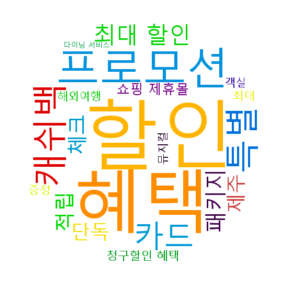

In [63]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
n = 2                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [65]:
n_grams = vectorizer.fit(my_words_2).get_feature_names()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_words_2).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

In [66]:
res_dict = {}
for z, zz in zip(n_grams, n_gram_cts):
    res_dict[z] = zz
res_dict = sorted(res_dict.items(), key=(lambda x: x[1]), reverse=True)
res_dict[:10]

[('최대 할인', 11),
 ('쇼핑 제휴몰', 8),
 ('청구할인 혜택', 8),
 ('다이닝 서비스', 7),
 ('만원 써프라이즈', 7),
 ('문화 방법', 7),
 ('방법 월간', 7),
 ('월간 컬처', 7),
 ('체크 혜택', 6),
 ('국내 해외', 4)]

In [67]:
def predict(text):
    n = 0
    print(text, "--->", end=" ")
    for i in range(len(res_dict)):
        if text == res_dict[i][0].split(" ")[0]:
            print(res_dict[i][0].split(" ")[1], end=" ")
            n += 1
        if n == 10:
            break
    print("")
    
def predict_arr(arr):
    for i in arr:
        predict(i)

In [68]:
predict_arr(['혜택', '할인', '프로모션', '캐쉬백', '특별'])

혜택 ---> 다이닝 실화 카드 경품 국내 글로벌 라발레 롯데워터파크 만원 매직 
할인 ---> 문화 삼성화재 해외호텔 공부 교직원복지 금호리조트 다이닝 두타면세점 롯데면세점 마켓 
프로모션 ---> 다이닝 그랜드 던킨도너츠 라운지 레스토랑 면세점 뮤즈투나잇 뮤직메이트 베베숲 부산 
캐쉬백 ---> 문화 레진코믹스 서른일곱번 서울랜드 손해보험 제주 주는거 체크 최대 카드 
특별 ---> 프로모션 혜택 가족 서른아홉번 서비스 손해보험 얼리버드 웨이하이포인트 패키지 


In [69]:
predict_arr(['여행', '맛집', '종합', '오늘', '개최', 
           '서울', '부산', '올해', '제주', '공개'])

여행 ---> 계절 최대 파크 해외여행자보험 현장 
맛집 ---> 삼성화재 
종합 ---> 
오늘 ---> 
개최 ---> 
서울 ---> 맞이 프라이빗 할인 
부산 ---> 다모 새봄 오션 화미주헤 
올해 ---> 
제주 ---> 히든 객실 고메 만원 예약 인조 카드 퍼시픽랜드 해비치 
공개 ---> 
